## HMDB extraction of serum metabolites:normal concentrations : Part1

- Serum Metabolites	downloaded from https://hmdb.ca/downloads ; version 4.0; release date 2018-12-18; Download size:192 MB

AS_08062021

In [1]:
import os
import xml.etree.ElementTree as ET
import pandas as pd

In [11]:
file_path = "../serum_metabolites.xml" # xml; serum metabolites
tree = ET.parse(file_path)
root = tree.getroot()

In [12]:
#New list
wanted = ['accession']
wanted_full_tag_list = ["{http://www.hmdb.ca}"+ x for x in wanted]

In [13]:
def extract(root, x):
    y = root.find(x).text
    if y:
        return y.strip() ## Leading and trailing whitespaces are removed including \n; a good practice
    else:
        return ''

### Xml tag list for concentration

just to look with focus where is what;

concentration_value and concentration_units i need; 

In [16]:
index = 0
cols = ["HMDB_accession",  "biospecimen", "concentration_value", "concentration_units",
        "subject_age","subject_sex",'subject_condition','reference_text','pubmed_id']
rows = []
for metab in root:
   
    for tag in wanted_full_tag_list:
        if metab.find(tag) is not None:
            HMDB_accession=extract(metab,tag)
            #print(HMDB_accession)
            
    for norm_conc_s in metab.iter("{http://www.hmdb.ca}normal_concentrations"):
        for conc in norm_conc_s:
            if "Blood" in conc[0].text or "Sera" in conc[0].text or "Serum" in conc[0].text: 
                biospecimen=conc[0].text
                concentration_value=conc[1].text
                concentration_units=conc[2].text
                subject_age=conc[3].text
                subject_sex=conc[4].text
                subject_condition=conc[5].text
                
                for sub in conc:
                    if "references" not in sub.tag:
                        reference_text=""
                        pubmed_id=""
                    if "references" in sub.tag:
                       
                        for ref in sub:
                            reference_text=ref[0].text#reference_text
                            #pubmed_id=ref[1].text#pubmed_id
                          
                            #print(test4, test5)
                            #print(ref[0].text)
                            rows.append({"HMDB_accession":HMDB_accession, 
                                         "biospecimen":biospecimen, 
                                         "concentration_value":concentration_value, 
                                         "concentration_units":concentration_units,
                                         "subject_age":subject_age,
                                         "subject_sex":subject_sex,
                                         'subject_condition':subject_condition,
                                        'reference_text':reference_text,
                                         'pubmed_id':pubmed_id
                                        })


                        #if "Blood" in conc[0].text or "Sera" in conc[0].text or "Serum" in conc[0].text: #Control the output normal conc.
                #print(conc[0].text)
                
                
   
    
    index += 1
    #if index > 12:
     #   break
        
        
df = pd.DataFrame(rows, columns=cols)     
            
    

In [9]:
df.head()

,HMDB_accession,biospecimen,concentration_value,concentration_units,subject_age,subject_sex,subject_condition,reference_text,pubmed_id
0,HMDB0000001,Blood,7.7 +/- 1.9,uM,Adult (>18 years old),Both,Normal,"Dohm GL, Williams RT, Kasperek GJ, van Rij AM:...",
1,HMDB0000001,Blood,14.4 +/- 2.3,uM,Adult (>18 years old),Both,Normal,"Dohm GL, Williams RT, Kasperek GJ, van Rij AM:...",
2,HMDB0000001,Blood,19.6 +/- 2.6,uM,Adult (>18 years old),Both,Normal,"Dohm GL, Williams RT, Kasperek GJ, van Rij AM:...",
3,HMDB0000001,Blood,12.7 +/- 2.9,uM,Adult (>18 years old),Both,Normal,"Dohm GL, Williams RT, Kasperek GJ, van Rij AM:...",
4,HMDB0000001,Blood,20.2 +/- 4.0,uM,Adult (>18 years old),Both,Normal,"Dohm GL, Williams RT, Kasperek GJ, van Rij AM:...",


In [18]:
# Writing dataframe to csv
df.to_csv('serum_metabolites_concentrations.csv')

### Summary: 

- The above table captures 11076 concentration values reported from various participants/samples/donors in HMDB for normal/healthy people and there are multiple concentrattion values reported against each HMDB entry as seen below in screenshot; 

- We decided to keep the median concentration value for single HMDB analyte/compound. 

- The part 2  data wrangling from here was done using serum_metabolites_concvalues_AS.R and we ended up with 2753 unique HMDB ids and associated concentration values; 

the rows that have value as **Not Quantified** e.g. in row 4th below wont be captured in csv.Just as a note. 

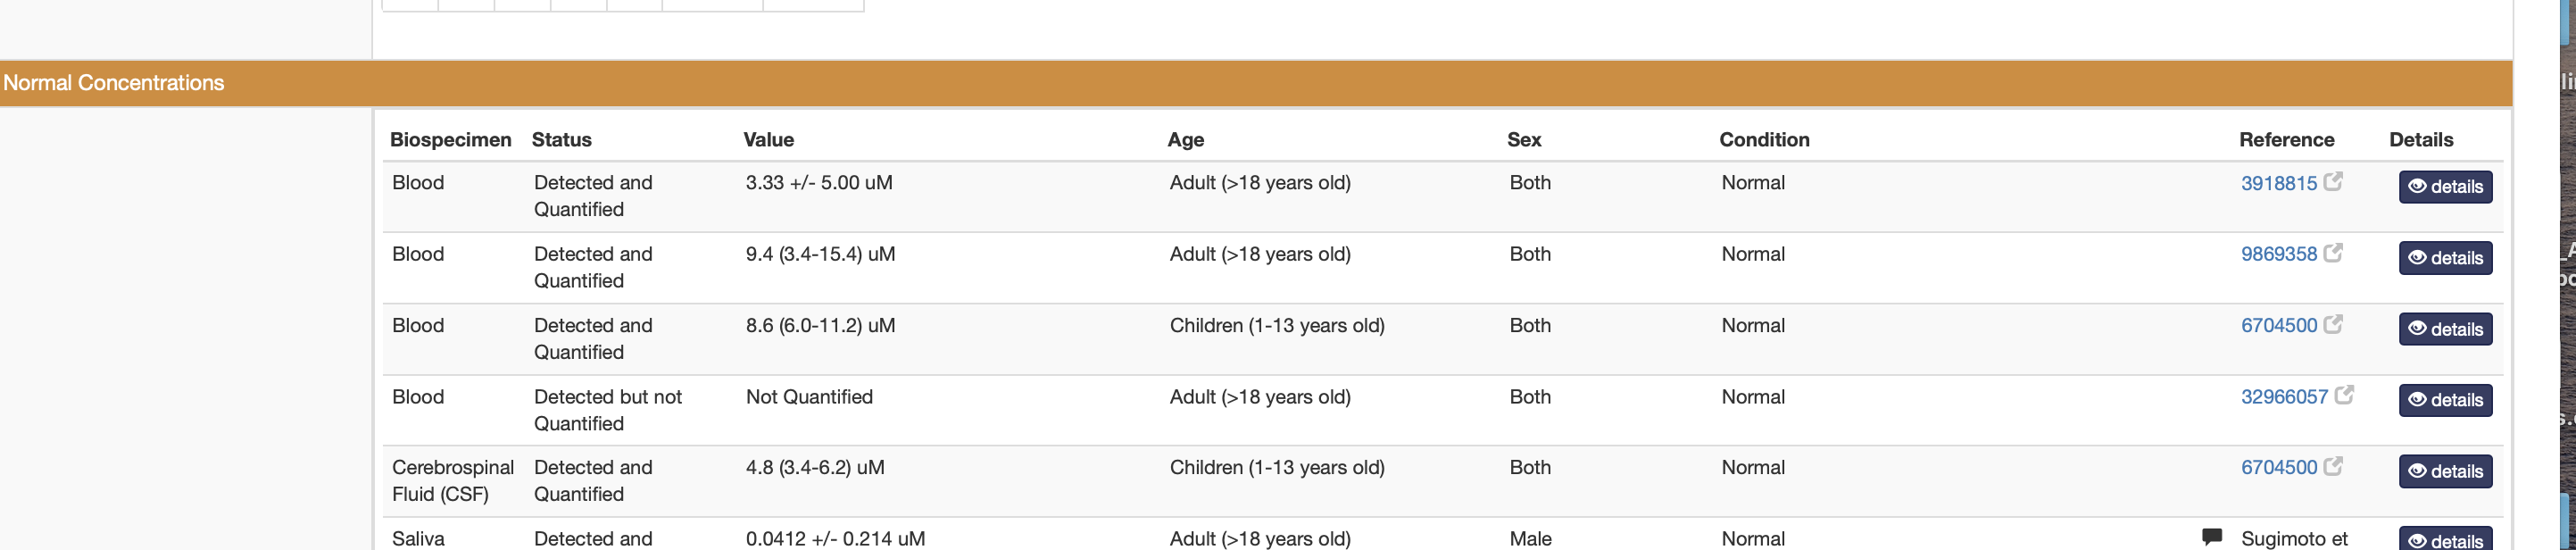

In [24]:
#from IPython.display import Image
Image(filename="/home/jovyan/work/HMDB_XML/screenshot.png")